In [3]:
# CCTV Seoul
import pandas as pd
import numpy as np

cctv_seoul=pd.read_csv('CCTV_Seoul.csv', encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'},inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


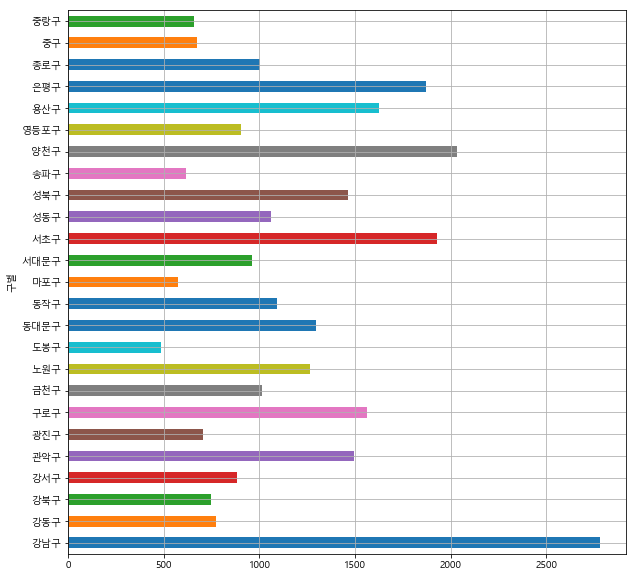

In [48]:
pop_seoul=pd.read_excel('population_Seoul.xls', encoding='utf-8', header=2, usecols='B,D,G,J,N')
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별', pop_seoul.columns[1]:'총인구', pop_seoul.columns[2]:'한국인', pop_seoul.columns[3]:'외국인', pop_seoul.columns[4]:'고령자'}, inplace=True)
pop_seoul.head()
pop_seoul.sort_index(axis=0)
pop_seoul.sort_values(by='총인구', ascending=False)
pop_seoul.sort_values(by=['총인구','한국인'], ascending=[True,False])

pop_seoul.drop([0],inplace=True)
pop_seoul.head()
pop_seoul['구별'].unique()
pop_seoul['구별'].isnull()
pop_seoul.drop([26], inplace=True)
pop_seoul['구별'].unique()
pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['총인구']*100
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['총인구']*100
pop_seoul.sort_values(by='총인구', ascending=False)

# pop_cctv + pop_seoul
merging_data=pd.merge(cctv_seoul, pop_seoul, on='구별')
merging_data.head()

from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name() 
rc('font',family=font_name)
merging_data.set_index('구별', inplace=True)
import matplotlib.pyplot as plt
merging_data['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [22]:
#cctv_seoul 최근증가율
cctv_seoul.head()

cctv_seoul['최근 증가율']=(cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년'])/cctv_seoul['2013년도 이전']*100
cctv_seoul.head()
cctv_seoul.sort_values(by='최근 증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
